In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [ ]:
presiones_arteriales = np.random.normal(loc=110, scale=10, size=800)
colesteroles = np.random.normal(loc=150, scale=30, size=800)
peso = np.random.normal(loc=70, scale=10, size=800)
X = np.array([presiones_arteriales, colesteroles]).T
y = np.array(
    [
        presion_arterial < 100 or presion_arterial > 120 or colesterol > 180
        for presion_arterial, colesterol in X
    ]
)

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)
predict_proba = clf.predict_proba(X)
predict_proba

array([[0.70264634, 0.29735366],
       [0.53549987, 0.46450013],
       [0.66573066, 0.33426934],
       ...,
       [0.54468408, 0.45531592],
       [0.70824617, 0.29175383],
       [0.4789138 , 0.5210862 ]])

In [157]:
riesgo_cardiovascular = np.zeros(800)
riesgo_cardiovascular[predict_proba[:, 1] > 0.5] = 1
riesgo_cardiovascular = riesgo_cardiovascular.astype(bool)
riesgo_cardiovascular

array([False, False, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False,  True, False,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True, False, False,  True, False, False,  True,  True, False,
       False, False,  True, False,  True,  True,  True, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True,  True, False,  True, False,  True, False,  True,
        True, False,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False,  True,  True,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False, False,

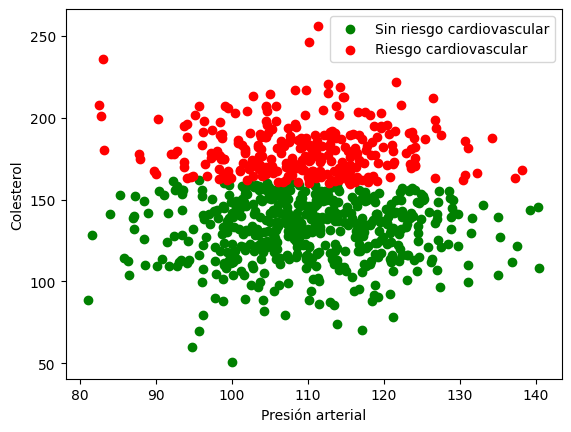

In [158]:
plt.scatter(
    presiones_arteriales[~riesgo_cardiovascular],
    colesteroles[~riesgo_cardiovascular],
    c="green",
    label="Sin riesgo cardiovascular",
)
plt.scatter(
    presiones_arteriales[riesgo_cardiovascular],
    colesteroles[riesgo_cardiovascular],
    c="red",
    label="Riesgo cardiovascular",
)
plt.xlabel("Presión arterial")
plt.ylabel("Colesterol")
plt.legend()
plt.show()

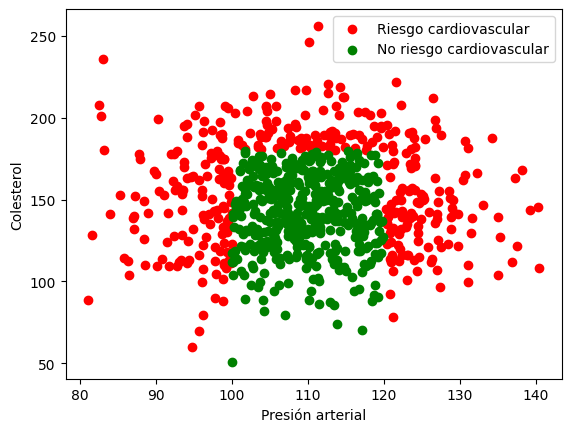

In [159]:
plt.scatter(
    presiones_arteriales[y],
    colesteroles[y],
    c="red",
    label="Riesgo cardiovascular",
)
plt.scatter(
    presiones_arteriales[~y],
    colesteroles[~y],
    c="green",
    label="No riesgo cardiovascular",
)
plt.xlabel("Presión arterial")
plt.ylabel("Colesterol")
plt.legend()
plt.show()
